In [8]:
import numpy as np
import torch
torch.cuda.is_available()

True

In [4]:
from transformers import pipeline
from datasets import load_dataset

# Load IMDb dataset
imdb = load_dataset("imdb")

# Specify GPU device index (change to 0, 1, etc., based on your GPU setup)
gpu_device_index = 0

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", device=gpu_device_index)

# Select a subset of the IMDb dataset for testing
small_test_dataset = imdb["train"].shuffle(seed=42).select([i for i in range(5000)])

# Get the maximum sequence length expected by the model
max_seq_length = sentiment_pipeline.model.config.max_position_embeddings

# Perform sentiment analysis on the selected subset
results = sentiment_pipeline([{"text": text[:max_seq_length]} for text in small_test_dataset["text"]])

# Print the results
print(results)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9507670402526855}, {'label': 'POSITIVE', 'score': 0.9998487234115601}, {'label': 'POSITIVE', 'score': 0.9987332224845886}, {'label': 'NEGATIVE', 'score': 0.9883384704589844}, {'label': 'NEGATIVE', 'score': 0.9773728251457214}, {'label': 'POSITIVE', 'score': 0.9997878670692444}, {'label': 'NEGATIVE', 'score': 0.9987277388572693}, {'label': 'NEGATIVE', 'score': 0.9997333884239197}, {'label': 'NEGATIVE', 'score': 0.9997005462646484}, {'label': 'NEGATIVE', 'score': 0.9876482486724854}, {'label': 'NEGATIVE', 'score': 0.9782690405845642}, {'label': 'NEGATIVE', 'score': 0.9992221593856812}, {'label': 'NEGATIVE', 'score': 0.9997581839561462}, {'label': 'NEGATIVE', 'score': 0.9992689490318298}, {'label': 'POSITIVE', 'score': 0.9948475360870361}, {'label': 'POSITIVE', 'score': 0.999848484992981}, {'label': 'NEGATIVE', 'score': 0.9998039603233337}, {'label': 'NEGATIVE', 'score': 0.9996470212936401}, {'label': 'POSITIVE', 'score': 0.9918626546859741}, {'label': 'P

In [15]:
pred_list = []
true_list = []

for i in range(len(small_test_dataset["label"])):
    true_val = small_test_dataset["label"][i]
    true_list.append(true_val)
    pred = results[i]["label"]
    if pred == "POSITIVE":
        pred = 1
    else:
        pred = 0
    pred_list.append(pred)

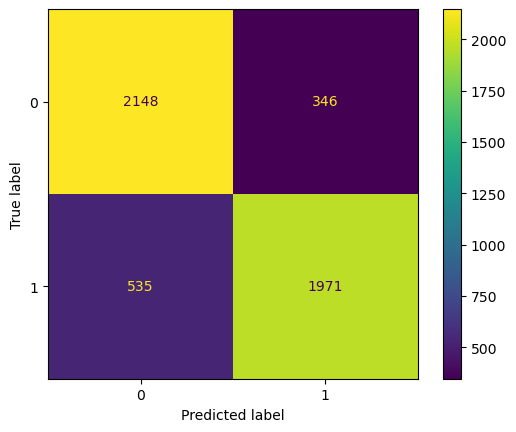

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(true_list, pred_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
from transformers import pipeline
from datasets import load_dataset
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Load IMDb dataset
imdb = load_dataset("imdb")

# Specify GPU device index (change to 0, 1, etc., based on your GPU setup)
gpu_device_index = 0

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", device=gpu_device_index)

# Select a subset of the IMDb dataset for testing
small_test_dataset = imdb["train"].shuffle(seed=42).select([i for i in range(1000)])

# Get the maximum sequence length expected by the model
max_seq_length = sentiment_pipeline.model.config.max_position_embeddings

# Perform sentiment analysis on the selected subset
results = sentiment_pipeline([{"text": text[:max_seq_length]} for text in small_test_dataset["text"]])

# Extract positive sentiment texts
positive_texts = [text["text"] for text, result in zip(small_test_dataset, results) if result["label"] == "POSITIVE"]

# Extract negative sentiment texts
negative_texts = [text["text"] for text, result in zip(small_test_dataset, results) if result["label"] == "NEGATIVE"]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [12]:
from transformers import pipeline
from datasets import load_dataset
from collections import Counter
import re
import nltk
from nltk.corpus import opinion_lexicon
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

# Download the Opinion Lexicon
# nltk.download('opinion_lexicon')

# Load IMDb dataset
imdb = load_dataset("imdb")

# Specify GPU device index (change to 0, 1, etc., based on your GPU setup)
gpu_device_index = 0

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", device=gpu_device_index)

# Select a subset of the IMDb dataset for testing
small_test_dataset = imdb["train"].shuffle(seed=42).select([i for i in range(5000)])

# Get the maximum sequence length expected by the model
max_seq_length = sentiment_pipeline.model.config.max_position_embeddings
print(max_seq_length)

# Perform sentiment analysis on the selected subset
results = sentiment_pipeline([{"text": text[:max_seq_length]} for text in small_test_dataset["text"]])

# Extract sentiment-relevant words from the Opinion Lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Initialize counters for positive and negative sentiment words
positive_word_counts = Counter()
negative_word_counts = Counter()

# Function to preprocess text (remove stopwords, lowercase, etc.)
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    words = re.findall(r'\b\w+\b', text.lower())
    return [word for word in words if word not in stop_words]

# Tokenize and preprocess positive and negative texts, and count sentiment-relevant words
for text, result in zip(small_test_dataset["text"], results):
    tokens = preprocess_text(text)
    if result["label"] == "POSITIVE":
        positive_word_counts.update(word for word in tokens if word in positive_words)
    elif result["label"] == "NEGATIVE":
        negative_word_counts.update(word for word in tokens if word in negative_words)

# Get the most frequent words in positive and negative sentiments
most_frequent_positive_words = positive_word_counts.most_common(10)
most_frequent_negative_words = negative_word_counts.most_common(10)

# Create a DataFrame for the results
data = {
    'Positive Word': [word for word, freq in most_frequent_positive_words],
    'Positive Frequency': [freq for word, freq in most_frequent_positive_words],
    'Negative Word': [word for word, freq in most_frequent_negative_words],
    'Negative Frequency': [freq for word, freq in most_frequent_negative_words]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


512
  Positive Word  Positive Frequency Negative Word  Negative Frequency
0          like                1712           bad                1437
1          good                1425          plot                 827
2          well                1186         funny                 483
3         great                1131         worst                 461
4          love                 852          hard                 287
5          best                 793          poor                 284
6        better                 450         awful                 281
7          work                 437        boring                 275
8           fun                 322         waste                 271
9        pretty                 319         wrong                 255


In [13]:
df

,Positive Word,Positive Frequency,Negative Word,Negative Frequency
0,like,1712,bad,1437
1,good,1425,plot,827
2,well,1186,funny,483
3,great,1131,worst,461
4,love,852,hard,287
5,best,793,poor,284
6,better,450,awful,281
7,work,437,boring,275
8,fun,322,waste,271
9,pretty,319,wrong,255
